# Polynomial Regression

## Importing the libraries

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
np.set_printoptions(threshold=sys.maxsize)

## Importing the dataset

In [54]:
dataset = pd.read_csv('Elastic.csv')
X = dataset.iloc[:, :-4].values
y = dataset.iloc[:, -2].values

In [55]:
print(y)

[3.88554132e+00 1.06562427e+01 8.20268381e+00 5.55861799e+01
 1.09120079e+01 5.55933807e+00 1.67824566e+01 4.47391621e+01
 1.83545939e+01 1.18245621e+01 4.39354256e+01 3.63927524e+01
 3.06637119e+01 1.17784675e+01 2.85672035e+01 1.27224836e+01
 2.41835065e+01 2.11419111e+01 3.55613832e+01 2.16830421e+01
 1.21627967e+01 3.57536864e+01 2.14944273e+01 7.79225632e+01
 4.69781961e+00 5.25317111e+01 1.03750979e+01 7.98509237e+00
 1.59462711e+01 5.79305673e+00 3.40551396e+01 8.93561950e+00
 6.15766888e+00 1.26550556e+01 5.36907551e+00 1.83385240e+01
 9.16309599e+00 1.04550005e+01 6.18374820e+00 4.09541278e+01
 1.14981967e+01 1.17383998e+01 2.54829415e+01 2.93520513e+01
 4.33020426e+01 4.95224340e+01 1.95684650e+01 2.11123535e+01
 2.83762981e+01 4.73713408e+01 5.15142434e+00 2.26328327e+01
 2.33875663e+01 4.75007275e+01 4.24689463e+01 4.13302038e+01
 4.54821101e+00 7.74299492e+01 5.11391848e+01 1.00828198e+01
 5.78337037e+00 3.14799952e+01 2.26034212e+01 8.19553037e+00
 5.21181922e+00 5.046226

In [56]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

## Training the Linear Regression model on the whole dataset

In [57]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [60]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 8)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

In [61]:
y_test_predict = lin_reg_2.predict(poly_reg.fit_transform(X_test))
mat= np.concatenate((y_test_predict.reshape(len(y_test_predict),1),y_test.reshape(len(y_test),1)),1)
file = open("sample.txt", "w")
file.write("%s = %s\n" %("a_dictionary", mat))

file.close()

## Visualising the Linear Regression results

In [14]:
print(X[:,1])

[3.94493266 6.2806171  6.13232228 ... 4.784613   9.44683443 7.30716232]


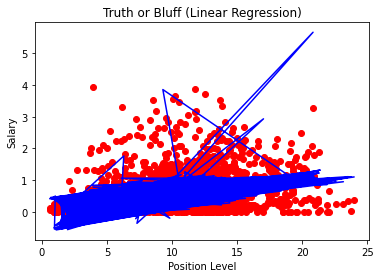

In [15]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

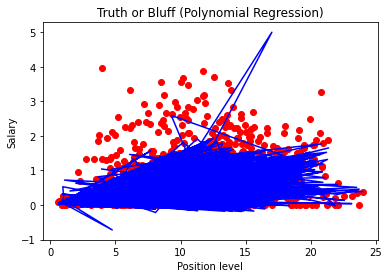

In [16]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

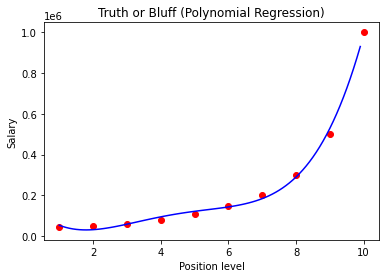

In [7]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [8]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [9]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])